In [1]:
import pandas as pd
from preproccesing import preprocces
import transformation
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../pricerunner_aggregate.csv')

In [3]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [3]:
df = preprocces(df)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/enriquevazquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df.head()

,Category ID,Category Label,words
0,0,Mobile Phones,"[apple, iphone, plus, gb, silver]"
1,0,Mobile Phones,"[apple, iphone, plus, gb, spacegrau]"
2,0,Mobile Phones,"[apple, mq, iphone, plus, gb, mp, sim, free, s..."
3,0,Mobile Phones,"[apple, iphone, plus, gb, space, grey]"
4,0,Mobile Phones,"[apple, iphone, plus, gold, gb, unlocked, sim,..."


In [5]:
train_vocab, test_vocab,y_train,y_test = transformation.obtain_vocabs(df,0.20,2)
train_embedds = transformation.embedd_sentences(train_vocab)
test_embedds = transformation.embedd_sentences(test_vocab)

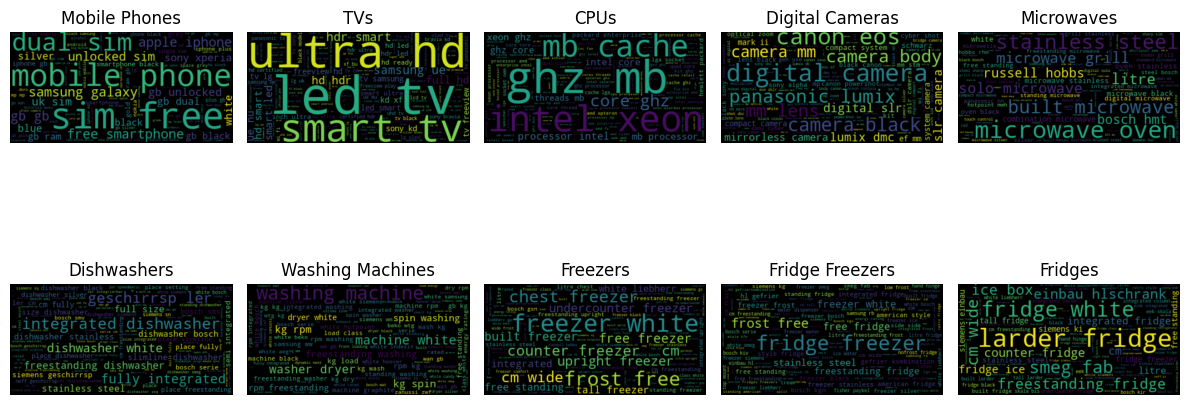

In [6]:
transformation.wordClouds(train_vocab,y_train)

In [8]:
kmeans = KMeans(n_clusters=10,random_state=2)
kmeans.fit(X=train_embedds)

/opt/anaconda3/envs/MLOps/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=2)

In [9]:
predicts = kmeans.predict(X = train_embedds)

In [10]:
acc = accuracy_score(y_train,predicts)
acc

0.14928490512602663

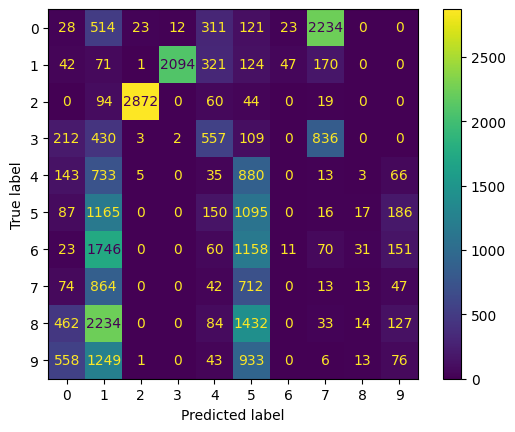

In [13]:
cm = confusion_matrix(y_train,predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()